In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
import warnings
import pickle
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
app_df = pd.read_csv('application_record.csv')
credit_df = pd.read_csv('credit_record.csv')

In [ ]:
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
app_df.shape

(438557, 18)

In [ ]:
app_df['ID'].nunique()

438510

In [ ]:
credit_df['ID'].nunique()

45985

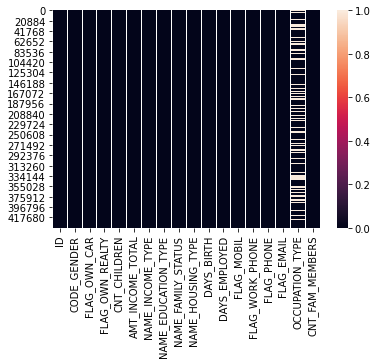

In [ ]:
sns.heatmap(app_df.isnull())

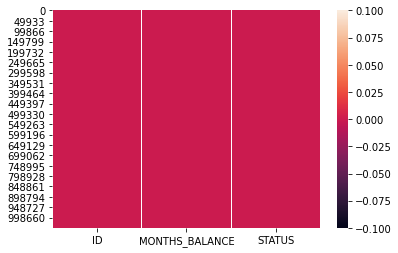

In [ ]:
sns.heatmap(credit_df.isnull())

In [ ]:
app_df = app_df.drop_duplicates('ID')

In [ ]:
len(set(app_df['ID']).intersection(set(credit_df['ID'])))

36457

In [ ]:
app_df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [ ]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
ot = pd.DataFrame(app_df.dtypes =='object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [ ]:
num_type = pd.DataFrame(app_df.dtypes != 'object').reset_index()
num_type = num_type[num_type[0] ==True]['index']
num_type

0                   ID
4         CNT_CHILDREN
5     AMT_INCOME_TOTAL
10          DAYS_BIRTH
11       DAYS_EMPLOYED
12          FLAG_MOBIL
13     FLAG_WORK_PHONE
14          FLAG_PHONE
15          FLAG_EMAIL
16     CNT_FAM_MEMBERS
Name: index, dtype: object

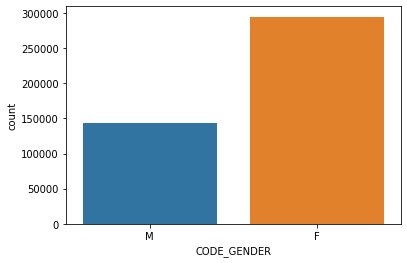

In [ ]:
sns.countplot(x ='CODE_GENDER', data = app_df)

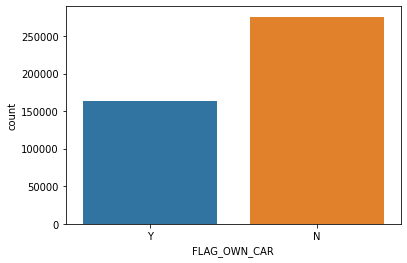

In [ ]:
sns.countplot(x ='FLAG_OWN_CAR', data = app_df)

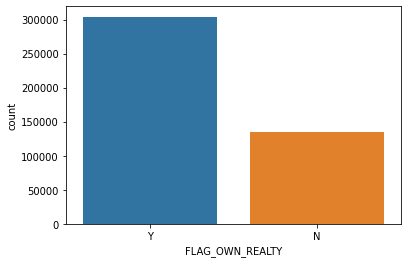

In [ ]:
sns.countplot(x ='FLAG_OWN_REALTY', data = app_df)

[Text(0, 0, 'Working'),
 Text(0, 0, 'Commercial associate'),
 Text(0, 0, 'Pensioner'),
 Text(0, 0, 'State servant'),
 Text(0, 0, 'Student')]

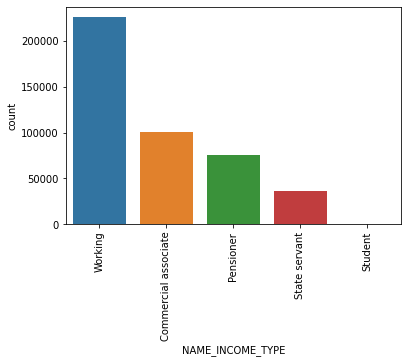

In [ ]:
chart = sns.countplot(x ='NAME_INCOME_TYPE', data = app_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Higher education'),
 Text(0, 0, 'Secondary / secondary special'),
 Text(0, 0, 'Incomplete higher'),
 Text(0, 0, 'Lower secondary'),
 Text(0, 0, 'Academic degree')]

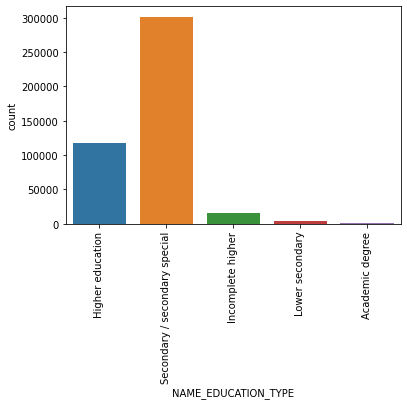

In [ ]:
chart = sns.countplot(x ='NAME_EDUCATION_TYPE', data = app_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Civil marriage'),
 Text(0, 0, 'Married'),
 Text(0, 0, 'Single / not married'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Widow')]

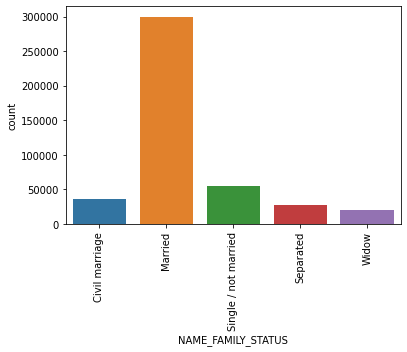

In [ ]:
chart = sns.countplot(x ='NAME_FAMILY_STATUS', data = app_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Rented apartment'),
 Text(0, 0, 'House / apartment'),
 Text(0, 0, 'Municipal apartment'),
 Text(0, 0, 'With parents'),
 Text(0, 0, 'Co-op apartment'),
 Text(0, 0, 'Office apartment')]

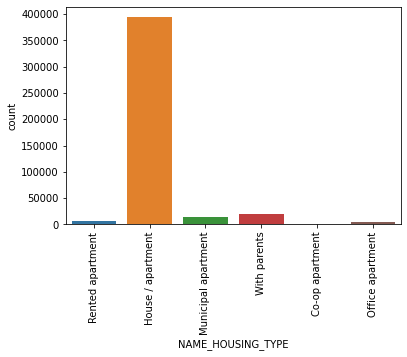

In [ ]:
chart = sns.countplot(x ='NAME_HOUSING_TYPE', data = app_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [ ]:
for o in object_type:
  pcl = pd.get_dummies(app_df[o], drop_first=True)
  app_df = pd.concat([app_df, pcl], axis=1)
  app_df.drop([o], axis=1, inplace=True)    

In [ ]:
app_df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,M,Y,Y,Pensioner,State servant,Student,Working,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


In [ ]:
app_df.shape

(438510, 30)

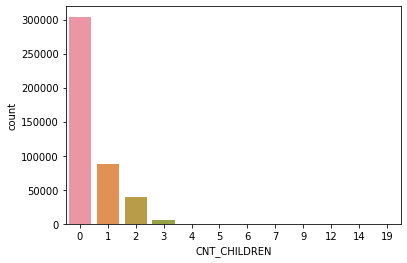

In [ ]:
sns.countplot(x ='CNT_CHILDREN', data=app_df)

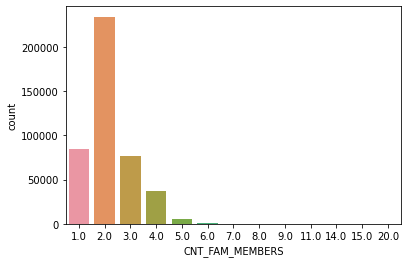

In [ ]:
sns.countplot(x ='CNT_FAM_MEMBERS', data=app_df)

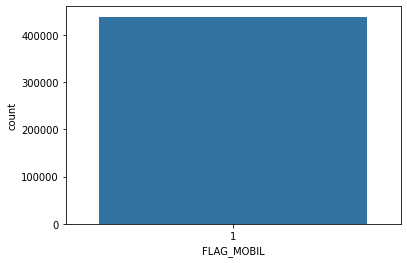

In [ ]:
sns.countplot(x ='FLAG_MOBIL', data=app_df)

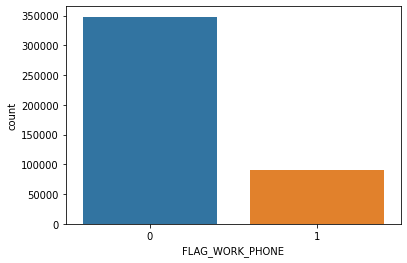

In [ ]:
sns.countplot(x ='FLAG_WORK_PHONE', data=app_df)

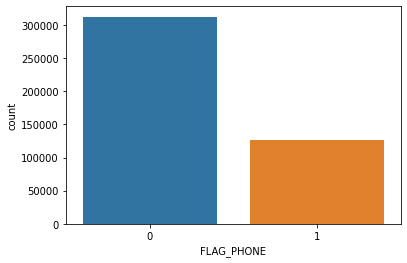

In [ ]:
sns.countplot(x ='FLAG_PHONE', data=app_df)

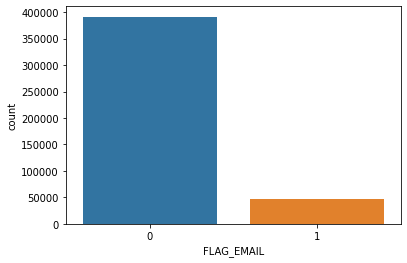

In [ ]:
sns.countplot(x ='FLAG_EMAIL', data=app_df)

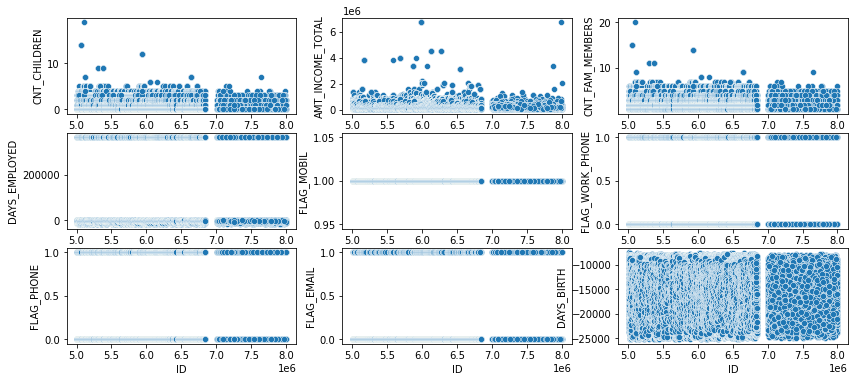

In [ ]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app_df, ax=ax[0][0])
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app_df, ax=ax[0][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app_df, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app_df, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app_df, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app_df, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app_df, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app_df, ax=ax[2][1])
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app_df, ax=ax[2][2])

In [ ]:
app_df.shape

(438510, 30)

In [ ]:
# FOR CNT_CHILDREN COLUMN
q_hi = app_df['CNT_CHILDREN'].quantile(0.999)
q_low = app_df['CNT_CHILDREN'].quantile(0.001)
app_df = app_df[(app_df['CNT_CHILDREN']>q_low) & (app_df['CNT_CHILDREN']<q_hi)]

In [ ]:
# FOR AMT_INCOME_TOTAL COLUMN
q_hi = app_df['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = app_df['AMT_INCOME_TOTAL'].quantile(0.001)
app_df= app_df[(app_df['AMT_INCOME_TOTAL']>q_low) & (app_df['AMT_INCOME_TOTAL']<q_hi)]

In [ ]:
#FOR CNT_FAM_MEMBERS COLUMN
q_hi = app_df['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = app_df['CNT_FAM_MEMBERS'].quantile(0.001)
app_df= app_df[(app_df['CNT_FAM_MEMBERS']>q_low) & (app_df['CNT_FAM_MEMBERS']<q_hi)]

In [ ]:
app_df.shape

(114188, 30)

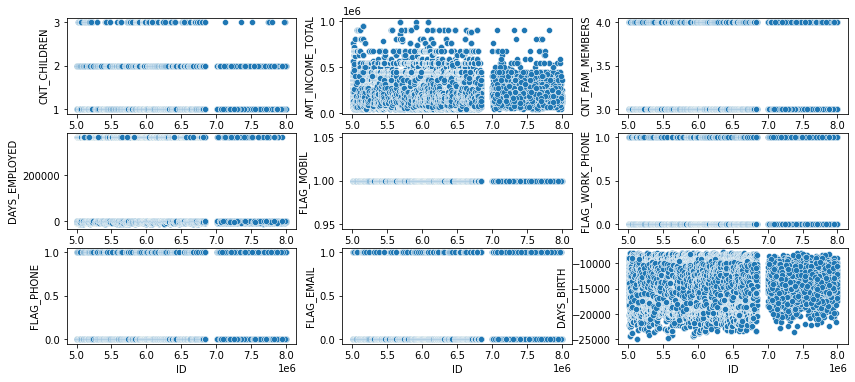

In [ ]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app_df, ax=ax[0][0])
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app_df, ax=ax[0][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app_df, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app_df, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app_df, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app_df, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app_df, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app_df, ax=ax[2][1])
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app_df, ax=ax[2][2])

In [ ]:
app_df.drop('FLAG_MOBIL',axis=1,inplace=True)

In [ ]:
app_df.shape

(114188, 29)

In [ ]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
credit_df.shape

(1048575, 3)

In [ ]:
credit_df['Months from today'] = credit_df['MONTHS_BALANCE']*-1
credit_df = credit_df.sort_values(['ID','Months from today'], ascending=True)
credit_df.head()

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0


In [ ]:
credit_df.drop('MONTHS_BALANCE',axis=1,inplace=True)
credit_df.head()

,ID,STATUS,Months from today
0,5001711,X,0
1,5001711,0,1
2,5001711,0,2
3,5001711,0,3
4,5001712,C,0


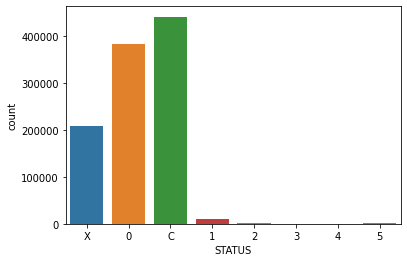

In [ ]:
sns.countplot(x ='STATUS', data=credit_df)

In [ ]:
credit_df['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
credit_df['STATUS'] = credit_df['STATUS'].astype('int')

In [ ]:
credit_df['STATUS'] = credit_df['STATUS'].apply(lambda x:1 if x >= 1 else 0)

In [ ]:
credit_df.head()

,ID,STATUS,Months from today
0,5001711,0,0
1,5001711,0,1
2,5001711,0,2
3,5001711,0,3
4,5001712,0,0


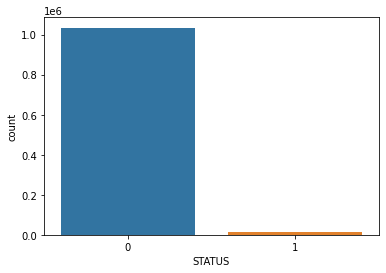

In [ ]:
sns.countplot(x ='STATUS', data=credit_df)

In [ ]:
credit_df_gb = credit_df.groupby('ID').agg(max).reset_index()
credit_df_gb.head()

,ID,STATUS,Months from today
0,5001711,0,3
1,5001712,0,18
2,5001713,0,21
3,5001714,0,14
4,5001715,0,59


In [ ]:
df = app_df.join(credit_df_gb.set_index('ID'), on='ID', how='inner')
df.drop(['ID'], axis=1, inplace=True)

In [ ]:
df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,M,Y,Y,Pensioner,State servant,Student,Working,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,STATUS,Months from today
29,1,405000.0,-11842,-2016,0,0,0,3.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,39
30,1,405000.0,-11842,-2016,0,0,0,3.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,13
31,1,405000.0,-11842,-2016,0,0,0,3.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,55
32,1,405000.0,-11842,-2016,0,0,0,3.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,4
33,1,405000.0,-11842,-2016,0,0,0,3.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,8


In [ ]:
df.shape

(9516, 30)

In [ ]:
X = df.drop('STATUS', axis=1)
y = df['STATUS']

In [ ]:
print(X.shape, y.shape)

(9516, 29) (9516,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [ ]:
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

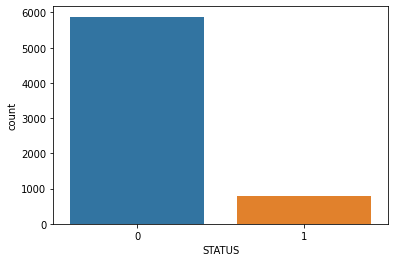

In [ ]:
sns.countplot(y_train)

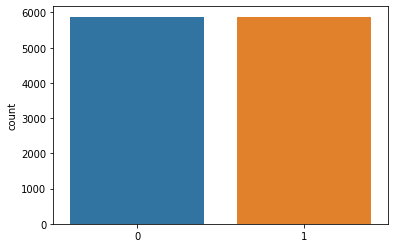

In [ ]:
sns.countplot(y_balanced)

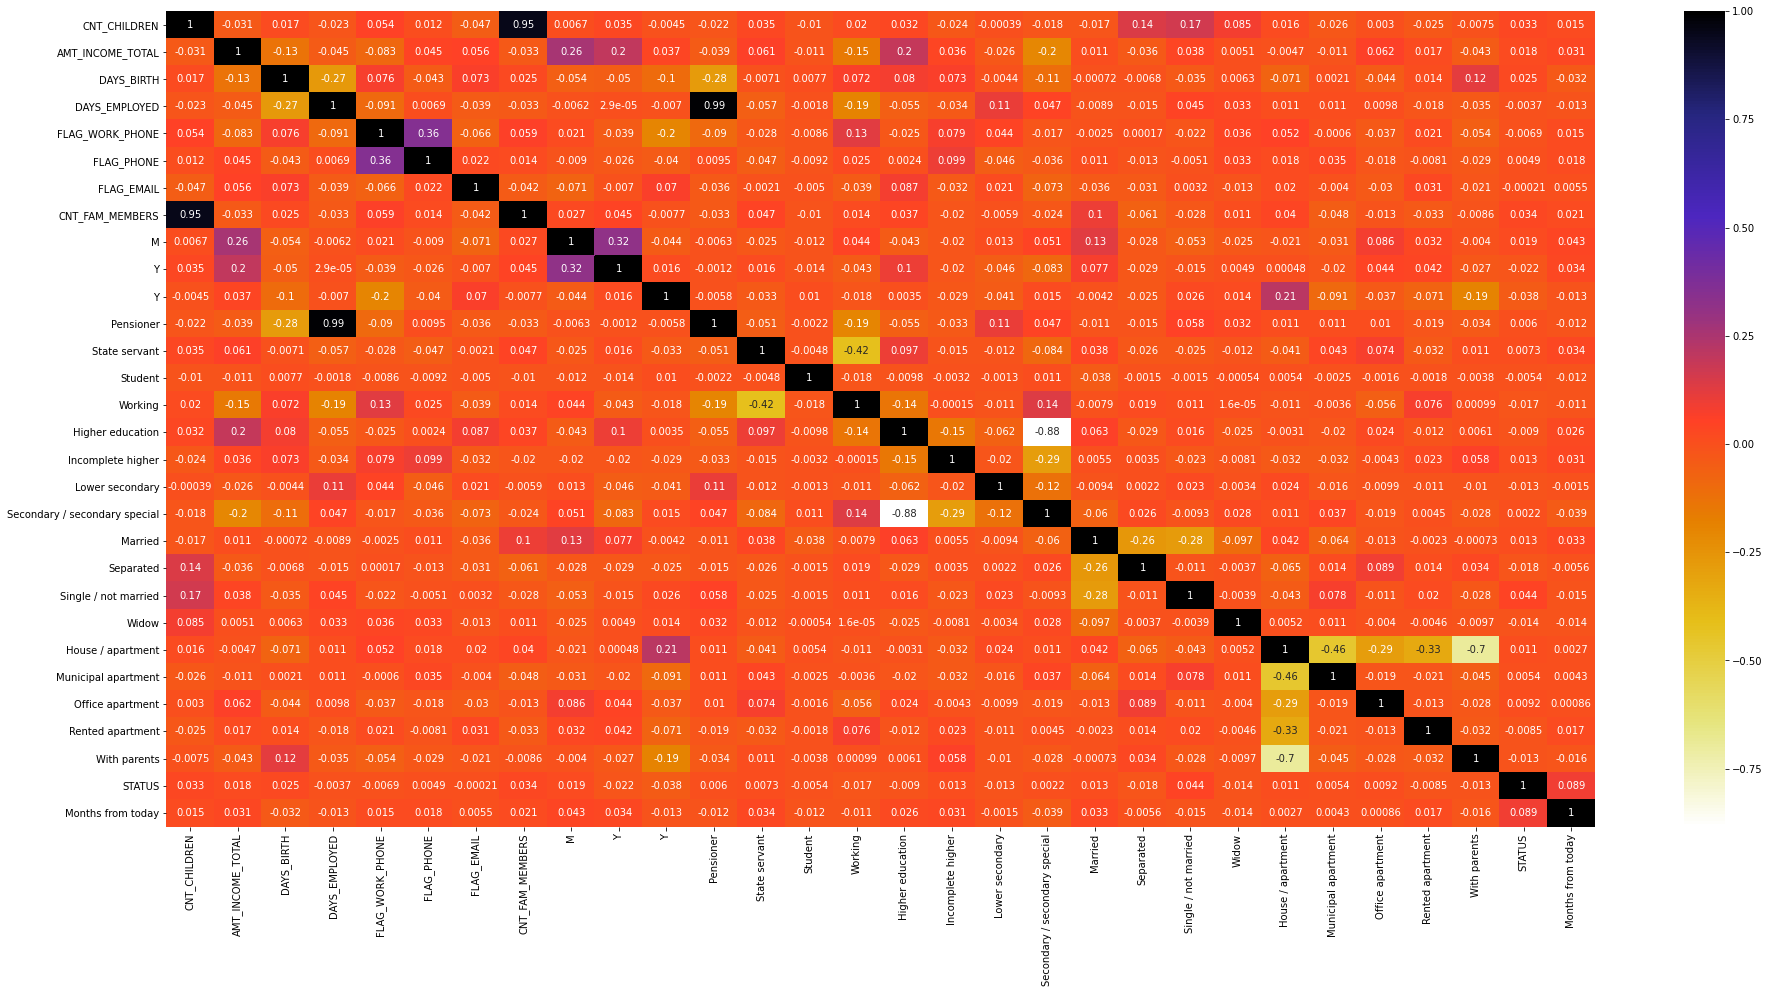

In [ ]:
plt.figure(figsize=(32,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

**Feature Selection**

In [ ]:
df.drop('CNT_CHILDREN',axis=1,inplace=True)
df.drop('DAYS_EMPLOYED',axis=1,inplace=True)

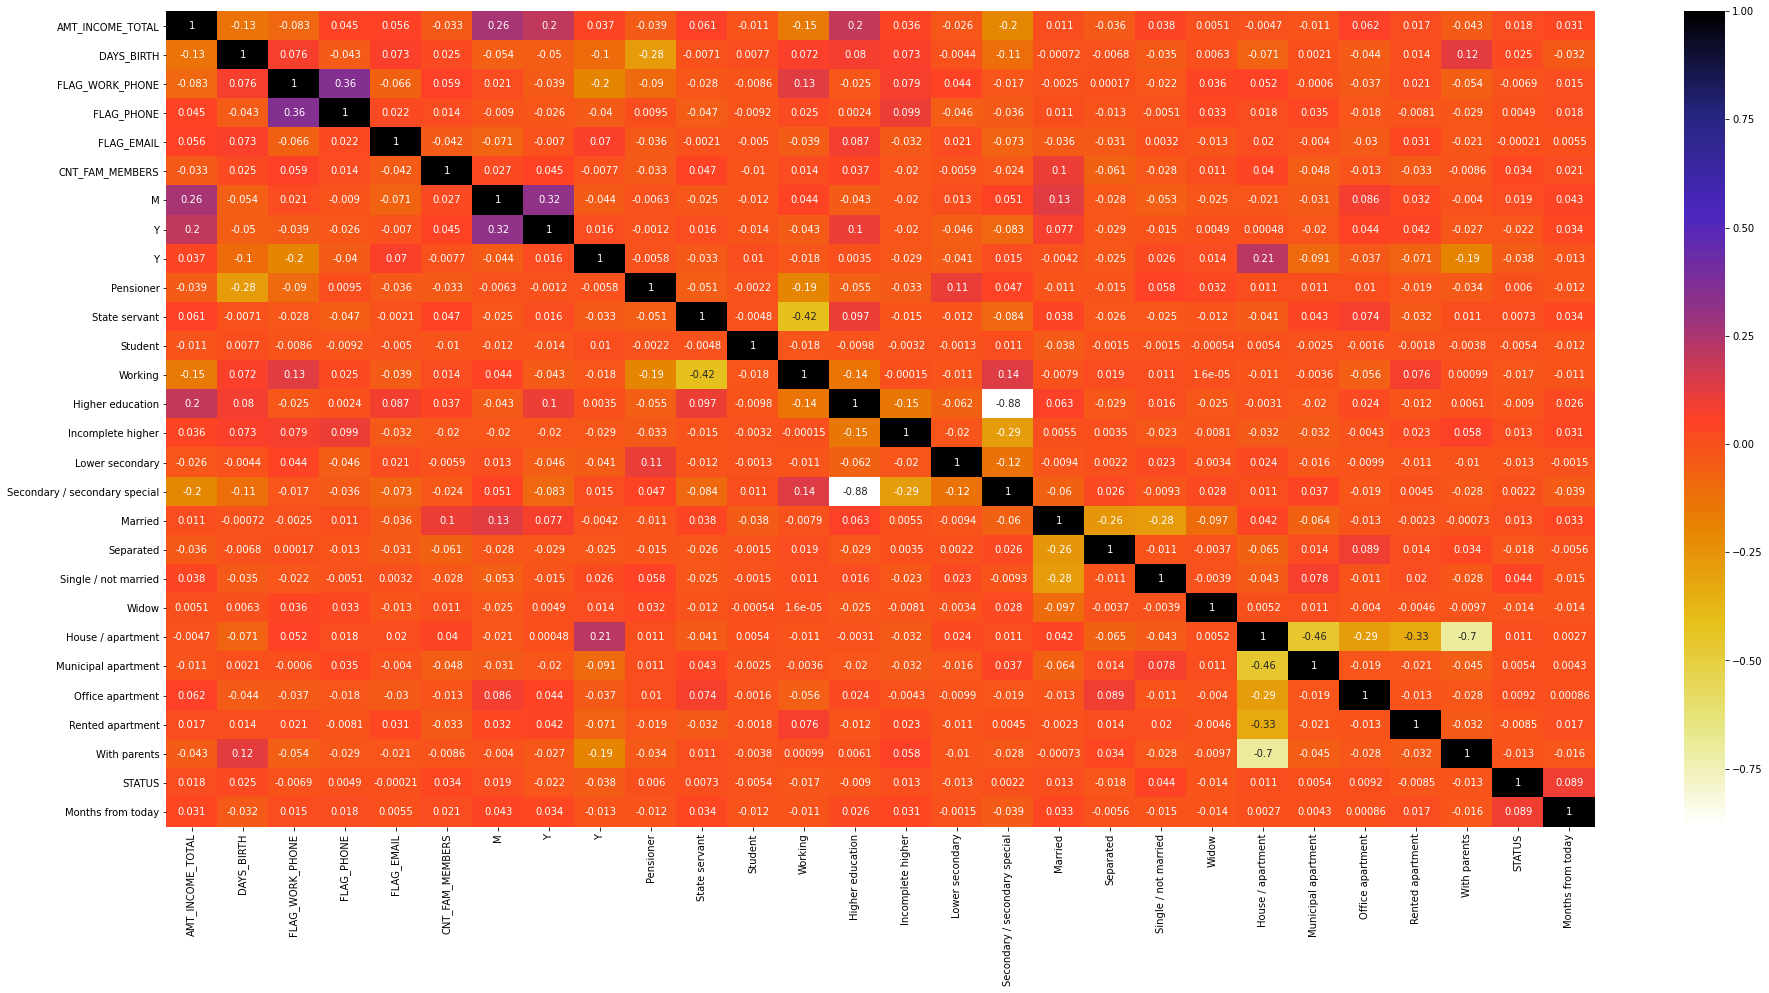

In [ ]:
plt.figure(figsize=(32,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# sns.pairplot(df,hue="STATUS")

**Models**

In [ ]:
##Confusion matrix plot
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred):
  label=[0,1]
  am= confusion_matrix(y_true, y_pred, label)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(am)
  plt.title('Confusion matrix of the classifier')
  fig.colorbar(cax)
  ax.set_xticklabels([''] + label)
  ax.set_yticklabels([''] + label)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

logistic accuracy: 0.8739054290718039
[[2491    0]
 [ 360    4]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2491
           1       1.00      0.01      0.02       364

    accuracy                           0.87      2855
   macro avg       0.94      0.51      0.48      2855
weighted avg       0.89      0.87      0.82      2855



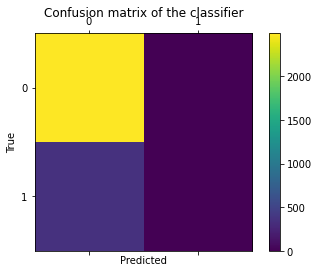

In [ ]:
lr1 = LogisticRegression(random_state=10,penalty='l2', n_jobs = -1, max_iter = 5000)
lr1.fit(X_scaled, y_train)
y_pred = lr1.predict(X_test_scaled)
print("logistic accuracy:",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(y_test, y_pred)

In [ ]:
# parameter_space = {
#     'penalty': ['l1','l2'],
#     'max_iter' : [250, 500, 1000, 2000, 5000,10000,20000,30000,40000,50000],
#     }
# mlp_cv = LogisticRegression()
# mlp_cv = RandomizedSearchCV(mlp_cv, parameter_space,random_state=0, cv=5, n_jobs=-1)
# mlp_cv.fit(X_balanced,y_balanced)
# print("Tuned Parameters: {}".format(mlp_cv.best_params_))

In [ ]:
# accuracy_lr_test=[]
# accuracy_lr_train=[]
# for i in range(10,501,10):
#   lr = LogisticRegression(penalty='l2', n_jobs = -1, max_iter = i)
#   lr.fit(X_balanced, y_balanced)
#   y_pred_test = lr.predict(X_test_balanced)
#   y_pred_train = lr.predict(X_balanced)
#   accuracy_lr_test.append(accuracy_score(y_test_balanced,y_pred_test))
#   accuracy_lr_train.append(accuracy_score(y_balanced,y_pred_train))
#   print(i)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500


In [ ]:
# print(np.argmax(accuracy_lr_test), max(accuracy_lr_test))

4 0.5651739304278288


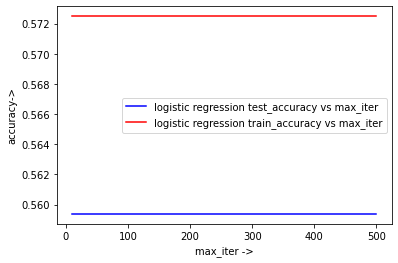

In [ ]:
x=[i for i in range(10,501,10)]
plt.plot(x,accuracy_lr_test,color='blue',label='logistic regression test_accuracy vs max_iter')
plt.plot(x,accuracy_lr_train,color='red',label="logistic regression train_accuracy vs max_iter")
plt.xlabel("max_iter ->")
plt.ylabel("accuracy->")
plt.legend()
plt.show()

logistic accuracy: 0.5651739304278288
[[1471 1030]
 [1145 1356]]
              precision    recall  f1-score   support

           0       0.56      0.59      0.57      2501
           1       0.57      0.54      0.55      2501

    accuracy                           0.57      5002
   macro avg       0.57      0.57      0.56      5002
weighted avg       0.57      0.57      0.56      5002



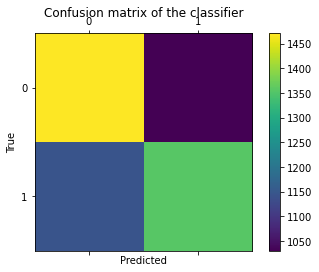

In [ ]:
lr = LogisticRegression(penalty='l2', n_jobs = -1, max_iter = 50)
lr.fit(X_balanced, y_balanced)
y_pred = lr.predict(X_test_balanced)
print("logistic accuracy:",accuracy_score(y_test_balanced,y_pred))
print(confusion_matrix(y_test_balanced,y_pred))
print(classification_report(y_test_balanced,y_pred))
plot_confusion_matrix(y_test_balanced, y_pred)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score
clf_lr = BaggingClassifier(base_estimator=LogisticRegression(penalty='l2', n_jobs = -1, max_iter = 50),random_state=820).fit(X_balanced, y_balanced)
print("score after bagging on LR",clf_lr.score(X_test_balanced,y_test_balanced))
y_pred=clf_lr.predict(X_test_balanced)
print(classification_report(y_test_balanced,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test_balanced,y_pred))

score after bagging on LR 0.5667732906837265
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      2501
           1       0.57      0.55      0.56      2501

    accuracy                           0.57      5002
   macro avg       0.57      0.57      0.57      5002
weighted avg       0.57      0.57      0.57      5002

ROC-AUC-Score 0.5667732906837264


mlp accuracy 0.8693520140105079
[[2399  102]
 [ 271   83]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2501
           1       0.45      0.23      0.31       354

    accuracy                           0.87      2855
   macro avg       0.67      0.60      0.62      2855
weighted avg       0.84      0.87      0.85      2855



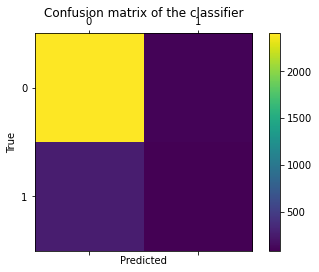

In [ ]:
mlp1=MLPClassifier(random_state=0,max_iter=500,learning_rate='adaptive',hidden_layer_sizes=(200,),alpha=1e-05)
mlp1.fit(X_scaled,y_train)
y_pred=mlp1.predict(X_test_scaled)
print("mlp accuracy",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(y_test, y_pred)

In [ ]:
# parameter_space = {
#     'hidden_layer_sizes': [(100,), (200,), (300,), (400,),(500,)],
#     'max_iter' : [250, 500, 1000, 2000, 5000,10000],
#     'alpha': [1e-5,1e-2,1e-1,1,5,10,20,30,40,50,100,200,500],
#     'learning_rate': ['adaptive']}
# mlp_cv = MLPClassifier(random_state=0)
# mlp_cv = RandomizedSearchCV(mlp_cv, parameter_space,random_state=0, cv=5,n_jobs=-1)
# mlp_cv.fit(X_balanced,y_balanced)
# print("Tuned Parameters: {}".format(mlp_cv.best_params_))

mlp accuracy 0.7363054778088765
[[2093  408]
 [ 911 1590]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76      2501
           1       0.80      0.64      0.71      2501

    accuracy                           0.74      5002
   macro avg       0.75      0.74      0.73      5002
weighted avg       0.75      0.74      0.73      5002



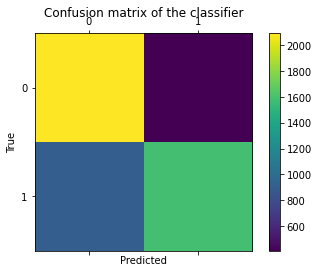

In [ ]:
mlp=MLPClassifier(random_state=1,max_iter=2000,learning_rate='adaptive',hidden_layer_sizes=(300,),alpha=1e-05)
mlp.fit(X_balanced,y_balanced)
y_pred=mlp.predict(X_test_balanced)
print("mlp accuracy",accuracy_score(y_pred,y_test_balanced))
print(confusion_matrix(y_test_balanced,y_pred))
print(classification_report(y_test_balanced,y_pred))
plot_confusion_matrix(y_test_balanced, y_pred)

random forest accuracy 0.8770577933450088
[[2377  114]
 [ 237  127]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2491
           1       0.53      0.35      0.42       364

    accuracy                           0.88      2855
   macro avg       0.72      0.65      0.68      2855
weighted avg       0.86      0.88      0.87      2855



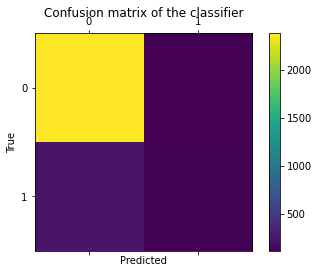

In [ ]:
rf1 = RandomForestClassifier(bootstrap = False, n_estimators = 53, max_features='sqrt',random_state = 0,n_jobs = -1)
rf1.fit(X_scaled, y_train)
y_pred = rf1.predict(X_test_scaled)
print("random forest accuracy",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(y_test, y_pred)

In [ ]:
# rf = RandomForestClassifier(random_state = 2)

# n_estimators = [i for i in range(5, 111, 3)]

# max_features = ['auto', 'sqrt']

# max_depth = [i for i in range(1, 100)]
# max_depth.append(None)

# bootstrap = [True, False]

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'bootstrap': bootstrap}

# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5,  random_state=42, n_jobs = -1)

# rf_random.fit(X_balanced, y_balanced)
# print(rf_random.best_params_)

In [ ]:
# list_ = []
# for i in range(100):
#   rf = RandomForestClassifier(bootstrap = False, n_estimators = 210, max_features='sqrt', random_state = i, n_jobs = -1)
#   rf.fit(X_balanced, y_balanced)
#   y_pred = rf.predict(X_test_balanced)
#   list_.append(accuracy_score(y_test_balanced,y_pred))
#   print(i)
# # print("random forest accuracy",accuracy_score(y_test_balanced,y_pred))


In [ ]:
# print(np.argmax(list_),list_[84])

In [ ]:
# accuracy_rf_test=[]
# accuracy_rf_train=[]
# for i in range(5,111,3):
#   rf = RandomForestClassifier(bootstrap = False, n_estimators = i, max_features='sqrt', random_state = 0,n_jobs = -1)
#   rf.fit(X_balanced, y_balanced)
#   y_pred_test = rf.predict(X_test_balanced)
#   y_pred_train = rf.predict(X_balanced)
#   accuracy_rf_test.append(accuracy_score(y_test_balanced,y_pred_test))
#   accuracy_rf_train.append(accuracy_score(y_balanced,y_pred_train))
#   print(i)

5
8
11
14
17
20
23
26
29
32
35
38
41
44
47
50
53
56
59
62
65
68
71
74
77
80
83
86
89
92
95
98
101
104
107
110


In [ ]:
# print((np.argmax(accuracy_rf_test)*3)+5,max(accuracy_rf_test))

53 0.8412284223203532


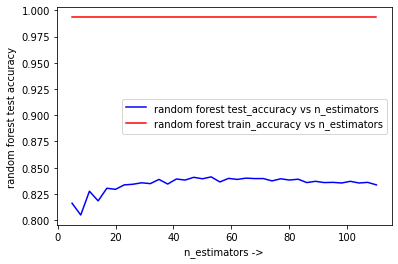

In [ ]:
x=[i for i in range(5,111,3)]
plt.plot(x,accuracy_rf_test,color='blue',label='random forest test_accuracy vs n_estimators')
plt.plot(x,accuracy_rf_train,color='red',label="random forest train_accuracy vs n_estimators")
plt.xlabel("n_estimators ->")
plt.ylabel("random forest test accuracy")
plt.legend()
plt.show()

random forest accuracy 0.8374146928944199
[[2318  173]
 [ 637 1854]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      2491
           1       0.91      0.74      0.82      2491

    accuracy                           0.84      4982
   macro avg       0.85      0.84      0.84      4982
weighted avg       0.85      0.84      0.84      4982



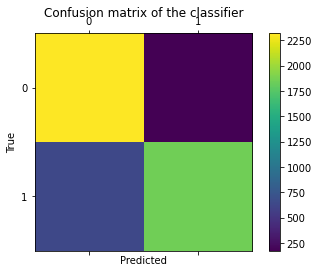

In [ ]:
rf = RandomForestClassifier(bootstrap = False, n_estimators = 53, max_features='auto', random_state = 84, n_jobs = -1)
rf.fit(X_balanced, y_balanced)
y_pred = rf.predict(X_test_balanced)
print("random forest accuracy",accuracy_score(y_test_balanced,y_pred))
print(confusion_matrix(y_test_balanced,y_pred))
print(classification_report(y_test_balanced,y_pred))
plot_confusion_matrix(y_test_balanced, y_pred)

In [ ]:
# list_ = []
# for i in range(100):
#   print(i)
#   clf_rf = BaggingClassifier(base_estimator= RandomForestClassifier(bootstrap = False, n_estimators = 53, max_features='auto', random_state = 84, n_jobs = -1),random_state=i).fit(X_balanced, y_balanced)
#   # print("score after bagging on RFC",clf_rf.score(X_test_balanced,y_test_balanced))
#   list_.append(clf_rf.score(X_test_balanced,y_test_balanced))

In [ ]:
print(np.argmax(list_),max(list_))

36 0.8270691723310676


In [ ]:
clf_rf = BaggingClassifier(base_estimator= RandomForestClassifier(bootstrap = False, n_estimators = 53, max_features='auto', random_state = 84, n_jobs = -1),random_state=36).fit(X_balanced, y_balanced)
print("score after bagging on RFC",clf_rf.score(X_test_balanced,y_test_balanced))
y_pred=clf_rf.predict(X_test_balanced)
print(classification_report(y_test_balanced,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test_balanced,y_pred))

score after bagging on RFC 0.8430349257326375
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      2491
           1       0.92      0.75      0.83      2491

    accuracy                           0.84      4982
   macro avg       0.86      0.84      0.84      4982
weighted avg       0.86      0.84      0.84      4982

ROC-AUC-Score 0.8430349257326376


knn accuracy 0.8690017513134851
[[2454   37]
 [ 337   27]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2491
           1       0.42      0.07      0.13       364

    accuracy                           0.87      2855
   macro avg       0.65      0.53      0.53      2855
weighted avg       0.82      0.87      0.83      2855



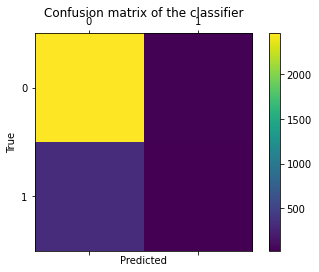

In [ ]:
knn1=KNeighborsClassifier(metric='manhattan',n_neighbors=98,weights='distance')
knn1.fit(X_scaled,y_train);
y_pred=knn1.predict(X_test_scaled)
print("knn accuracy",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(y_test, y_pred)

In [ ]:
# model = KNeighborsClassifier()
# n_neighbors = range(1, 21, 2)
# weights = ['uniform', 'distance']
# metric = ['euclidean', 'manhattan', 'minkowski']
# # grid search
# grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_balanced, y_balanced)
# print("Best parameters" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
# list_ = []
# for i in range(1,100):
#   knn=KNeighborsClassifier(metric='manhattan',n_neighbors=i,weights='distance')
#   knn.fit(X_balanced,y_balanced)
#   y_pred=knn.predict(X_test_balanced)
#   list_.append(accuracy_score(y_test_balanced,y_pred))
#   print(i)
# #print("knn accuracy",accuracy_score(y_test_balanced,y_pred))

In [ ]:
# print(np.argmax(list_),list_[84])

In [ ]:
# accuracy_knn_test=[]
# accuracy_knn_train=[]
# for i in range(1,100):
#   knn = KNeighborsClassifier(metric='manhattan',n_neighbors=i,weights='distance')
#   knn.fit(X_balanced, y_balanced)
#   y_pred_test = knn.predict(X_test_balanced)
#   y_pred_train = knn.predict(X_balanced)
#   accuracy_knn_test.append(accuracy_score(y_test_balanced,y_pred_test))
#   accuracy_knn_train.append(accuracy_score(y_balanced,y_pred_train))
#   print(i)

In [ ]:
# filename = 'knn_test.sav'
# pickle.dump(accuracy_knn_test, open(filename, 'wb'))
# filename = 'knn_train.sav'
# pickle.dump(accuracy_knn_train, open(filename, 'wb'))

In [ ]:
accuracy_knn_test = pickle.load(open('knn_test.sav','rb'))
accuracy_knn_train = pickle.load(open('knn_train.sav','rb'))
print(np.argmax(accuracy_knn_test)+1,max(accuracy_knn_test))
print(np.argmax(accuracy_knn_train)+1,max(accuracy_knn_train))

98 0.7509928514694202
21 0.9513924483171023


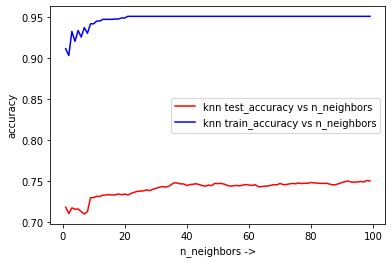

In [ ]:
x=[i for i in range(1,100)]
plt.plot(x,accuracy_knn_test,color='red',label='knn test_accuracy vs n_neighbors')
plt.plot(x,accuracy_knn_train,color='blue',label='knn train_accuracy vs n_neighbors')
plt.xlabel("n_neighbors ->")
plt.ylabel("accuracy")
plt.legend()
plt.show()

knn accuracy 0.734906037584966
[[2231  270]
 [1056 1445]]
              precision    recall  f1-score   support

           0       0.68      0.89      0.77      2501
           1       0.84      0.58      0.69      2501

    accuracy                           0.73      5002
   macro avg       0.76      0.73      0.73      5002
weighted avg       0.76      0.73      0.73      5002



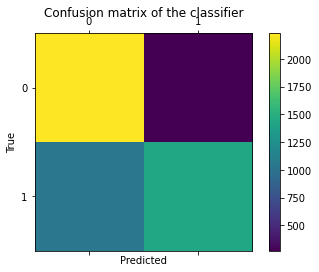

In [ ]:
knn=KNeighborsClassifier(metric='manhattan',n_neighbors=98,weights='distance')
knn.fit(X_balanced,y_balanced)
y_pred=knn.predict(X_test_balanced)
print("knn accuracy",accuracy_score(y_test_balanced,y_pred))
print(confusion_matrix(y_test_balanced,y_pred))
print(classification_report(y_test_balanced,y_pred))
plot_confusion_matrix(y_test_balanced, y_pred)

In [ ]:
clf_knn = BaggingClassifier(base_estimator= KNeighborsClassifier(metric='manhattan',n_neighbors=98,weights='distance'),random_state=3).fit(X_balanced, y_balanced)
print("score after bagging on DTC",clf_knn.score(X_test_balanced,y_test_balanced))
y_pred=clf_knn.predict(X_test_balanced)
print(classification_report(y_test_balanced,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test_balanced,y_pred))

score after bagging on DTC 0.7321071571371451
              precision    recall  f1-score   support

           0       0.68      0.88      0.77      2501
           1       0.83      0.58      0.69      2501

    accuracy                           0.73      5002
   macro avg       0.75      0.73      0.73      5002
weighted avg       0.75      0.73      0.73      5002

ROC-AUC-Score 0.7321071571371451


Accuracy: 0.8518388791593695
[[2298  193]
 [ 230  134]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2491
           1       0.41      0.37      0.39       364

    accuracy                           0.85      2855
   macro avg       0.66      0.65      0.65      2855
weighted avg       0.85      0.85      0.85      2855



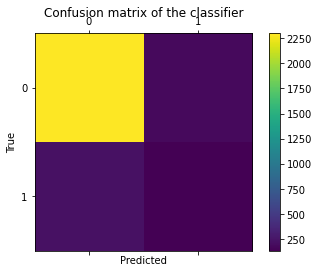

In [ ]:
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=50,max_features='auto')
clf1.fit(X_scaled,y_train)
y_pred = clf1.predict(X_test_scaled)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(y_test, y_pred)

In [ ]:
# max_features = ['auto', 'sqrt']
# clf = DecisionTreeClassifier()
# max_depth = [i for i in range(1, 100)]
# max_depth.append(None)

# random_state = [i for i in range(100)]

# bootstrap = [True, False]

# random_grid = {
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'random_state': random_state,
#                }

# clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, random_state=1, n_jobs = -1)
# clf_random.fit(X_balanced, y_balanced)
# print(clf_random.best_params_)

In [ ]:
# accuracy_dtc_test=[]
# accuracy_dtc_train=[]
# for i in range(1,100):
#   dtc = DecisionTreeClassifier(criterion="entropy", max_depth=i,max_features='auto',random_state=50)
#   dtc.fit(X_balanced, y_balanced)
#   y_pred_test = dtc.predict(X_test_balanced)
#   y_pred_train = dtc.predict(X_balanced)
#   accuracy_dtc_test.append(accuracy_score(y_test_balanced,y_pred_test))
#   accuracy_dtc_train.append(accuracy_score(y_balanced,y_pred_train))
#   print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [ ]:
# print(np.argmax(accuracy_dtc_test)+1,max(accuracy_dtc_test))

26 0.7888844462215114


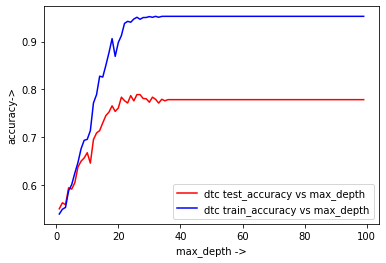

In [ ]:
x=[i for i in range(1,100)]
plt.plot(x,accuracy_dtc_test,color='red',label='dtc test_accuracy vs max_depth')
plt.plot(x,accuracy_dtc_train,color='blue',label='dtc train_accuracy vs max_depth')
plt.xlabel("max_depth ->")
plt.ylabel("accuracy->")
plt.legend()
plt.show()

Accuracy: 0.7888844462215114
[[2287  214]
 [ 842 1659]]
              precision    recall  f1-score   support

           0       0.73      0.91      0.81      2501
           1       0.89      0.66      0.76      2501

    accuracy                           0.79      5002
   macro avg       0.81      0.79      0.79      5002
weighted avg       0.81      0.79      0.79      5002



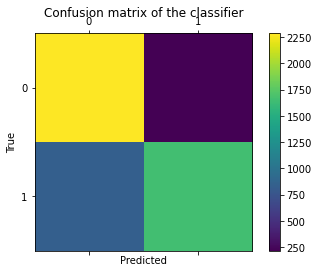

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=26,max_features='auto',random_state=50)
clf.fit(X_balanced,y_balanced)
y_pred = clf.predict(X_test_balanced)
print("Accuracy:",accuracy_score(y_test_balanced, y_pred))
print(confusion_matrix(y_test_balanced,y_pred))
print(classification_report(y_test_balanced,y_pred))
plot_confusion_matrix(y_test_balanced, y_pred)

In [ ]:
# list_ = []
# list_i = []
# list_j = []
# for i in range(1,100):  
#   for j in range(100):
#     clf = DecisionTreeClassifier(criterion="entropy", max_depth=i,max_features=s,random_state=j)
#     clf.fit(X_balanced,y_balanced)
#     y_pred = clf.predict(X_test_balanced)
#     # print(i, j, "Accuracy:",accuracy_score(y_test_balanced, y_pred))
#     list_.append(accuracy_score(y_test_balanced, y_pred))
#     list_i.append(i)
#     list_j.append(j)
#     list_f.append(s)
#     if(j%100==0):
#       print(i,j)


# # print(confusion_matrix(y_test_balanced,y_pred))
# # print(classification_report(y_test_balanced,y_pred))
# # plot_confusion_matrix(y_test_balanced, y_pred)


In [ ]:
# print(np.argmax(list_),list_[3450],list_i[3450], list_j[3450])

In [ ]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.metrics import roc_auc_score
# list_ = []
# for i in range(100):
#   clf = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion="entropy", max_depth=35,max_features='auto',random_state=50),random_state=60).fit(X_balanced, y_balanced)
#   # print(i, "score after bagging on DTC",clf.score(X_test_balanced,y_test_balanced))
#   list_.append(clf.score(X_test_balanced,y_test_balanced))
# y_pred=clf.predict(X_test_balanced)
# print(classification_report(y_test_balanced,y_pred))
# print('ROC-AUC-Score' , roc_auc_score(y_test_balanced,y_pred))

In [ ]:
# print(np.argmax(list_),list_[60])

In [ ]:
clf_dtc = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion="entropy", max_depth=26,max_features='auto',random_state=50),random_state=60).fit(X_balanced, y_balanced)
print("score after bagging on DTC",clf_dtc.score(X_test_balanced,y_test_balanced))
y_pred=clf_dtc.predict(X_test_balanced)
print(classification_report(y_test_balanced,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test_balanced,y_pred))

score after bagging on DTC 0.8110755697720912
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      2501
           1       0.89      0.71      0.79      2501

    accuracy                           0.81      5002
   macro avg       0.82      0.81      0.81      5002
weighted avg       0.82      0.81      0.81      5002

ROC-AUC-Score 0.8110755697720912


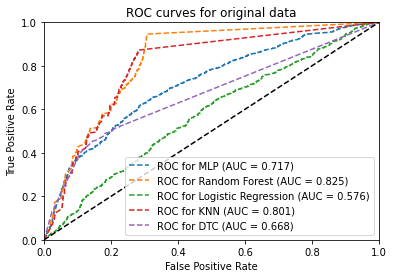

In [ ]:
nn_probs=mlp1.predict_proba(X_test_balanced)[:,1]
nn_fpr,nn_tpr,threshold=roc_curve(y_test_balanced,nn_probs)
nn_auc=auc(nn_fpr,nn_tpr)
plt.plot(nn_fpr, nn_tpr, linestyle='--', label='ROC for MLP (AUC = %0.3f)' % nn_auc)

rf_probs=rf1.predict_proba(X_test_balanced)[:,1]
rf_fpr,rf_tpr,threshold=roc_curve(y_test_balanced,rf_probs)
rf_auc=auc(rf_fpr,rf_tpr)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='ROC for Random Forest (AUC = %0.3f)' % rf_auc)

lr_probs=lr1.predict_proba(X_test_balanced)[:,1]
lr_fpr,lr_tpr,threshold=roc_curve(y_test_balanced,lr_probs)
lr_auc=auc(lr_fpr,lr_tpr)
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='ROC for Logistic Regression (AUC = %0.3f)' % lr_auc)

knn_probs=knn1.predict_proba(X_test_balanced)[:,1]
knn_fpr,knn_tpr,threshold=roc_curve(y_test_balanced,knn_probs)
knn_auc=auc(knn_fpr,knn_tpr)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='ROC for KNN (AUC = %0.3f)' % knn_auc)

dtc_probs=clf1.predict_proba(X_test_balanced)[:,1]
dtc_fpr,dtc_tpr,threshold=roc_curve(y_test_balanced,dtc_probs)
dtc_auc=auc(dtc_fpr,dtc_tpr)
plt.plot(dtc_fpr, dtc_tpr, linestyle='--', label='ROC for DTC (AUC = %0.3f)' % dtc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for original data')
plt.legend(loc="lower right")
plt.show()

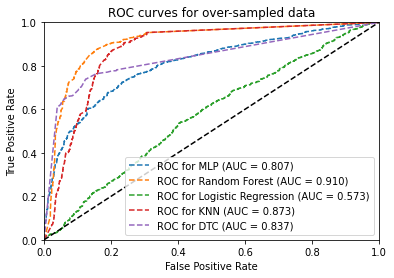

In [ ]:
nn_probs=mlp.predict_proba(X_test_balanced)[:,1]
nn_fpr,nn_tpr,threshold=roc_curve(y_test_balanced,nn_probs)
nn_auc=auc(nn_fpr,nn_tpr)
plt.plot(nn_fpr, nn_tpr, linestyle='--', label='ROC for MLP (AUC = %0.3f)' % nn_auc)

rf_probs=rf.predict_proba(X_test_balanced)[:,1]
rf_fpr,rf_tpr,threshold=roc_curve(y_test_balanced,rf_probs)
rf_auc=auc(rf_fpr,rf_tpr)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='ROC for Random Forest (AUC = %0.3f)' % rf_auc)

lr_probs=lr.predict_proba(X_test_balanced)[:,1]
lr_fpr,lr_tpr,threshold=roc_curve(y_test_balanced,lr_probs)
lr_auc=auc(lr_fpr,lr_tpr)
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='ROC for Logistic Regression (AUC = %0.3f)' % lr_auc)

knn_probs=knn.predict_proba(X_test_balanced)[:,1]
knn_fpr,knn_tpr,threshold=roc_curve(y_test_balanced,knn_probs)
knn_auc=auc(knn_fpr,knn_tpr)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='ROC for KNN (AUC = %0.3f)' % knn_auc)

dtc_probs=clf.predict_proba(X_test_balanced)[:,1]
dtc_fpr,dtc_tpr,threshold=roc_curve(y_test_balanced,dtc_probs)
dtc_auc=auc(dtc_fpr,dtc_tpr)
plt.plot(dtc_fpr, dtc_tpr, linestyle='--', label='ROC for DTC (AUC = %0.3f)' % dtc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for over-sampled data')
plt.legend(loc="lower right")
plt.show()

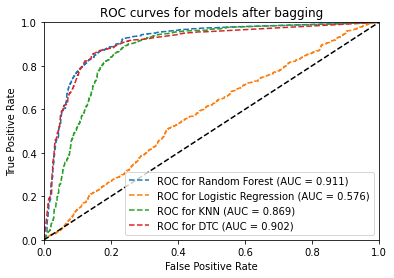

In [ ]:
rf_probs=clf_rf.predict_proba(X_test_balanced)[:,1]
rf_fpr,rf_tpr,threshold=roc_curve(y_test_balanced,rf_probs)
rf_auc=auc(rf_fpr,rf_tpr)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='ROC for Random Forest (AUC = %0.3f)' % rf_auc)

lr_probs=clf_lr.predict_proba(X_test_balanced)[:,1]
lr_fpr,lr_tpr,threshold=roc_curve(y_test_balanced,lr_probs)
lr_auc=auc(lr_fpr,lr_tpr)
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='ROC for Logistic Regression (AUC = %0.3f)' % lr_auc)

knn_probs=clf_knn.predict_proba(X_test_balanced)[:,1]
knn_fpr,knn_tpr,threshold=roc_curve(y_test_balanced,knn_probs)
knn_auc=auc(knn_fpr,knn_tpr)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='ROC for KNN (AUC = %0.3f)' % knn_auc)

dtc_probs=clf_dtc.predict_proba(X_test_balanced)[:,1]
dtc_fpr,dtc_tpr,threshold=roc_curve(y_test_balanced,dtc_probs)
dtc_auc=auc(dtc_fpr,dtc_tpr)
plt.plot(dtc_fpr, dtc_tpr, linestyle='--', label='ROC for DTC (AUC = %0.3f)' % dtc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for models after bagging')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
estimator = []
estimator.append(('RFC', RandomForestClassifier(bootstrap = False, n_estimators = 83, max_features='auto', random_state = 84, n_jobs = -1)))
estimator.append(('DTC', DecisionTreeClassifier(criterion="entropy", max_depth=26,max_features='auto',random_state=50)))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_balanced, y_balanced)
y_predh = vot_hard.predict(X_test_balanced)
  

score = accuracy_score(y_test_balanced, y_predh)
print("Hard Voting Score ", score)
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_balanced, y_balanced)
y_preds = vot_soft.predict(X_test_balanced)
  
# using accuracy_score
score = accuracy_score(y_test_balanced, y_preds)
print("Soft Voting Score ", score)

Hard Voting Score  0.7830188679245284
Soft Voting Score  0.7834203131272581
